# Install Required Packages

In [ ]:
!pip install ultralytics opencv-python

## **Import Libraries**

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Webcam**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64

def take_frame():
    js = Javascript('''
    async function capture() {
        const video = document.createElement('video');
        video.width = 640;
        video.height = 480;
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        await new Promise(resolve => setTimeout(resolve, 500));
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks()[0].stop();
        video.remove();

        return canvas.toDataURL('image/jpeg');
    }
    capture();
    ''')
    display(js)
    data = eval_js("capture()")
    img_bytes = base64.b64decode(data.split(',')[1])
    img = np.frombuffer(img_bytes, dtype=np.uint8)
    return cv2.imdecode(img, cv2.IMREAD_COLOR)

## **Model Training**

<IPython.core.display.Javascript object>


0: 480x640 1 bottle, 1 potted plant, 1 vase, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


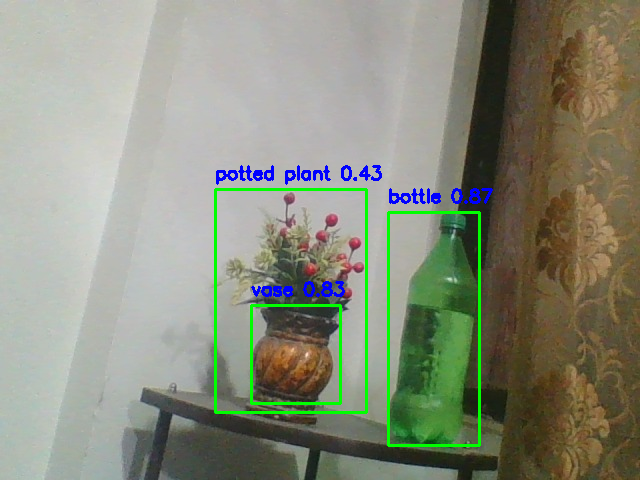

In [ ]:
frame = take_frame()

results = model(frame, conf=0.4)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = model.names[int(box.cls[0])]
        conf = box.conf[0]

        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(frame,
                    f"{label} {conf:.2f}",
                    (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (255,0,0),
                    2)

cv2_imshow(frame)